In [5]:
%matplotlib inline
import pandas as pd
import numpy as np

In [6]:
df_data = pd.read_csv("C:/Users/sst160312/DAY1_vr3_0_0/ks-projects-201801.csv")


In [7]:
df_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
df_data.select_dtypes('object').apply(pd.Series.nunique,axis=0)

name             375764
category            159
main_category        15
currency             14
deadline           3164
launched         378089
state                 6
country              23
dtype: int64

In [9]:
df_data=df_data.drop("ID",axis=1)

In [10]:
df_data=df_data.drop("name",axis=1)

In [11]:
df_data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [12]:
print(len(df_data))

378661


In [13]:
print(len(df_data))

378661


In [14]:
df_data = df_data[df_data.state.str.contains("canceled") == False]

In [15]:
print(len(df_data))

339882


In [16]:
df_data = df_data[df_data.state.str.contains("live") == False]

In [17]:
df_data = df_data[df_data.state.str.contains("suspended") == False]

In [18]:
df_data = df_data[df_data.state.str.contains("undefined") == False]

In [19]:
print(len(df_data))

331675


In [20]:
df_data.select_dtypes('object').apply(pd.Series.nunique,axis=0)


category            159
main_category        15
currency             14
deadline           3102
launched         331255
state                 2
country              23
dtype: int64

In [21]:
df_data=df_data.drop("pledged",axis=1)

In [22]:
df_data=df_data.drop("country",axis=1)
df_data=df_data.drop("usd pledged",axis=1)
df_data=df_data.drop("usd_pledged_real",axis=1)
df_data=df_data.drop("usd_goal_real",axis=1)

In [23]:
df_data.head()

,category,main_category,currency,deadline,goal,launched,state,backers
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,224


In [24]:
# 日付型に変換
df_data['deadline'] = pd.to_datetime(df_data['deadline'])
df_data['launched'] = pd.to_datetime(pd.to_datetime(df_data['launched']).dt.strftime('%Y-%m-%d'))

In [25]:
df_data['datenum'] = (df_data['deadline']-df_data['launched']).astype('timedelta64[D]')

In [26]:
df_data.loc[df_data['state'] == 'successful', 'state_flg'] = 1
df_data.loc[df_data['state'] != 'successful', 'state_flg'] = 0

In [27]:
df_data.head()

,category,main_category,currency,deadline,goal,launched,state,backers,datenum,state_flg
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,failed,0,59.0,0.0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,60.0,0.0
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,45.0,0.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,30.0,0.0
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,successful,224,35.0,1.0


In [28]:
#backersは投資人数なので予測段階では不明な説明変数のため除外
#category数は150以上と多く、one-hot-encordingには向いていなさそう
#main_categoryとcurrencyをone-hot-encordingしてみる。

In [29]:
df_data = pd.get_dummies(df_data, columns=['main_category','currency'])

In [30]:
df_data.head()

,category,deadline,goal,launched,state,backers,datenum,state_flg,main_category_Art,main_category_Comics,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,Poetry,2015-10-09,1000.0,2015-08-11,failed,0,59.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Narrative Film,2017-11-01,30000.0,2017-09-02,failed,15,60.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Narrative Film,2013-02-26,45000.0,2013-01-12,failed,3,45.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Music,2012-04-16,5000.0,2012-03-17,failed,1,30.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Restaurants,2016-04-01,50000.0,2016-02-26,successful,224,35.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df_data_col=['category','deadline','launched','state','backers']
df_data=df_data.drop(df_data_col,axis=1)
df_data.head()

,goal,datenum,state_flg,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,59.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,60.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,45.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,30.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,35.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# 相関係数を確認
df_data.corr()

,goal,datenum,state_flg,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
goal,1.000000,0.022692,-0.025099,-0.000864,-0.003662,-0.004621,-0.003291,-0.000461,-0.004483,0.013758,...,0.003710,-0.005173,0.004898,0.010552,0.013077,0.012088,-0.000711,0.016739,-0.000783,-0.008478
datenum,0.022692,1.000000,-0.116437,-0.036935,-0.001492,-0.030644,-0.009370,0.004162,-0.026566,0.037583,...,0.012848,-0.054041,0.000385,-0.003416,0.013080,0.002672,-0.012681,-0.003603,-0.005289,0.035064
state_flg,-0.025099,-0.116437,1.000000,0.026554,0.066964,-0.042224,0.053270,0.007077,-0.062116,0.012959,...,-0.058082,0.003807,0.003786,-0.001689,-0.016415,-0.010679,-0.006610,-0.009206,-0.000891,0.056581
main_category_Art,-0.000864,-0.036935,0.026554,1.000000,-0.050714,-0.044973,-0.030206,-0.083293,-0.072884,-0.131198,...,-0.010340,0.005803,-0.001750,-0.001055,0.005016,-0.003809,-0.003192,-0.001968,-0.004610,0.006419
main_category_Comics,-0.003662,-0.001492,0.066964,-0.050714,1.000000,-0.027222,-0.018283,-0.050416,-0.044116,-0.079412,...,-0.021357,-0.005850,-0.004309,-0.001459,-0.003821,-0.000589,-0.006578,-0.005262,-0.003128,0.016097
main_category_Crafts,-0.004621,-0.030644,-0.042224,-0.044973,-0.027222,1.000000,-0.016214,-0.044709,-0.039122,-0.070423,...,-0.001260,0.006929,-0.000652,-0.001294,0.007249,-0.000363,0.001597,-0.000765,0.007148,-0.009788
main_category_Dance,-0.003291,-0.009370,0.053270,-0.030206,-0.018283,-0.016214,1.000000,-0.030029,-0.026276,-0.047300,...,-0.012318,-0.005495,-0.003190,-0.000869,0.002603,-0.001596,-0.002703,-0.004454,-0.003074,0.018869
main_category_Design,-0.000461,0.004162,0.007077,-0.083293,-0.050416,-0.044709,-0.030029,1.000000,-0.072457,-0.130428,...,0.033175,0.001670,0.042069,0.003053,-0.005212,0.000633,0.006158,0.004639,0.025555,-0.042041
main_category_Fashion,-0.004483,-0.026566,-0.062116,-0.072884,-0.044116,-0.039122,-0.026276,-0.072457,1.000000,-0.114129,...,0.020744,0.012198,0.003548,0.008607,-0.005503,-0.000249,0.002890,0.000940,0.022018,-0.032915
main_category_Film & Video,0.013758,0.037583,0.012959,-0.131198,-0.079412,-0.070423,-0.047300,-0.130428,-0.114129,1.000000,...,-0.049275,0.005507,-0.015297,-0.003775,0.002405,-0.007178,-0.005331,-0.008856,-0.013528,0.046747


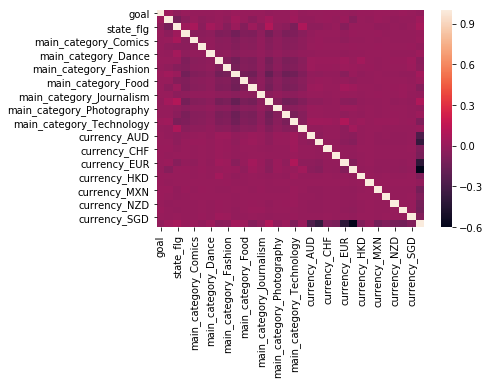

In [33]:
# 相関係数をヒートマップにして可視化
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_data.corr())
plt.show()

In [34]:
#stateとの相関が弱いものを除く
df_data_col=['currency_SGD','currency_JPY','currency_DKK','currency_GBP','currency_HKD']
df_data=df_data.drop(df_data_col,axis=1)

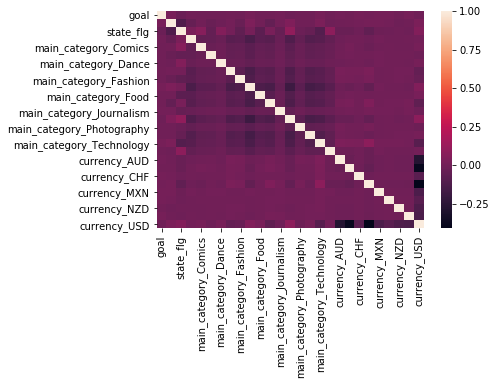

In [35]:
sns.heatmap(df_data.corr())
plt.show()

In [36]:
# 相関係数を確認
df_data.corr()

,goal,datenum,state_flg,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,main_category_Theater,currency_AUD,currency_CAD,currency_CHF,currency_EUR,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_USD
goal,1.000000,0.022692,-0.025099,-0.000864,-0.003662,-0.004621,-0.003291,-0.000461,-0.004483,0.013758,...,-0.003310,0.003193,0.001889,0.010035,0.003710,0.013077,0.012088,-0.000711,0.016739,-0.008478
datenum,0.022692,1.000000,-0.116437,-0.036935,-0.001492,-0.030644,-0.009370,0.004162,-0.026566,0.037583,...,-0.009011,-0.008339,-0.000709,0.004746,0.012848,0.013080,0.002672,-0.012681,-0.003603,0.035064
state_flg,-0.025099,-0.116437,1.000000,0.026554,0.066964,-0.042224,0.053270,0.007077,-0.062116,0.012959,...,0.085158,-0.029129,-0.027914,-0.010589,-0.058082,-0.016415,-0.010679,-0.006610,-0.009206,0.056581
main_category_Art,-0.000864,-0.036935,0.026554,1.000000,-0.050714,-0.044973,-0.030206,-0.083293,-0.072884,-0.131198,...,-0.051669,-0.010480,-0.001172,-0.001632,-0.010340,0.005016,-0.003809,-0.003192,-0.001968,0.006419
main_category_Comics,-0.003662,-0.001492,0.066964,-0.050714,1.000000,-0.027222,-0.018283,-0.050416,-0.044116,-0.079412,...,-0.031275,-0.003955,0.009775,-0.005373,-0.021357,-0.003821,-0.000589,-0.006578,-0.005262,0.016097
main_category_Crafts,-0.004621,-0.030644,-0.042224,-0.044973,-0.027222,1.000000,-0.016214,-0.044709,-0.039122,-0.070423,...,-0.027734,-0.000151,0.007582,0.001629,-0.001260,0.007249,-0.000363,0.001597,-0.000765,-0.009788
main_category_Dance,-0.003291,-0.009370,0.053270,-0.030206,-0.018283,-0.016214,1.000000,-0.030029,-0.026276,-0.047300,...,-0.018628,-0.008838,-0.007753,-0.002653,-0.012318,0.002603,-0.001596,-0.002703,-0.004454,0.018869
main_category_Design,-0.000461,0.004162,0.007077,-0.083293,-0.050416,-0.044709,-0.030029,1.000000,-0.072457,-0.130428,...,-0.051366,0.020333,0.013688,0.016429,0.033175,-0.005212,0.000633,0.006158,0.004639,-0.042041
main_category_Fashion,-0.004483,-0.026566,-0.062116,-0.072884,-0.044116,-0.039122,-0.026276,-0.072457,1.000000,-0.114129,...,-0.044947,0.018229,0.010157,0.004923,0.020744,-0.005503,-0.000249,0.002890,0.000940,-0.032915
main_category_Film & Video,0.013758,0.037583,0.012959,-0.131198,-0.079412,-0.070423,-0.047300,-0.130428,-0.114129,1.000000,...,-0.080908,-0.017566,-0.026192,-0.012151,-0.049275,0.002405,-0.007178,-0.005331,-0.008856,0.046747


In [37]:
##currencyとの相関はUSD、EUR以外低いので除外
df_data_col=['currency_SEK','currency_NZD','currency_NOK','currency_MXN','currency_CHF','currency_CAD','currency_AUD']
df_data=df_data.drop(df_data_col,axis=1)

In [38]:
# 相関係数を確認
df_data.corr()

,goal,datenum,state_flg,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_EUR,currency_USD
goal,1.000000,0.022692,-0.025099,-0.000864,-0.003662,-0.004621,-0.003291,-0.000461,-0.004483,0.013758,0.000776,-0.000843,0.002842,-0.010504,-0.005071,-0.007943,0.018785,-0.003310,0.003710,-0.008478
datenum,0.022692,1.000000,-0.116437,-0.036935,-0.001492,-0.030644,-0.009370,0.004162,-0.026566,0.037583,-0.001235,-0.041898,0.002608,0.042324,-0.006003,-0.006150,0.030692,-0.009011,0.012848,0.035064
state_flg,-0.025099,-0.116437,1.000000,0.026554,0.066964,-0.042224,0.053270,0.007077,-0.062116,0.012959,-0.069602,0.021896,-0.036692,0.100303,-0.022191,-0.040085,-0.100826,0.085158,-0.058082,0.056581
main_category_Art,-0.000864,-0.036935,0.026554,1.000000,-0.050714,-0.044973,-0.030206,-0.083293,-0.072884,-0.131198,-0.077252,-0.088784,-0.032579,-0.116077,-0.050212,-0.100126,-0.086255,-0.051669,-0.010340,0.006419
main_category_Comics,-0.003662,-0.001492,0.066964,-0.050714,1.000000,-0.027222,-0.018283,-0.050416,-0.044116,-0.079412,-0.046760,-0.053740,-0.019719,-0.070260,-0.030392,-0.060605,-0.052209,-0.031275,-0.021357,0.016097
main_category_Crafts,-0.004621,-0.030644,-0.042224,-0.044973,-0.027222,1.000000,-0.016214,-0.044709,-0.039122,-0.070423,-0.041467,-0.047656,-0.017487,-0.062307,-0.026952,-0.053745,-0.046299,-0.027734,-0.001260,-0.009788
main_category_Dance,-0.003291,-0.009370,0.053270,-0.030206,-0.018283,-0.016214,1.000000,-0.030029,-0.026276,-0.047300,-0.027851,-0.032008,-0.011745,-0.041848,-0.018102,-0.036097,-0.031097,-0.018628,-0.012318,0.018869
main_category_Design,-0.000461,0.004162,0.007077,-0.083293,-0.050416,-0.044709,-0.030029,1.000000,-0.072457,-0.130428,-0.076799,-0.088263,-0.032387,-0.115396,-0.049917,-0.099538,-0.085749,-0.051366,0.033175,-0.042041
main_category_Fashion,-0.004483,-0.026566,-0.062116,-0.072884,-0.044116,-0.039122,-0.026276,-0.072457,1.000000,-0.114129,-0.067202,-0.077233,-0.028340,-0.100975,-0.043679,-0.087099,-0.075033,-0.044947,0.020744,-0.032915
main_category_Film & Video,0.013758,0.037583,0.012959,-0.131198,-0.079412,-0.070423,-0.047300,-0.130428,-0.114129,1.000000,-0.120969,-0.139026,-0.051014,-0.181764,-0.078626,-0.156786,-0.135066,-0.080908,-0.049275,0.046747


In [39]:
##main_categoryとの相関も全体的に低いが特に低いものを除外する
df_data_col=['main_category_Design','main_category_Film & Video']
df_data=df_data.drop(df_data_col,axis=1)

In [40]:
y = df_data["state_flg"].values

In [41]:
X = df_data.drop('state_flg', axis=1).values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [46]:
# 標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_val = stdsc.transform(X_val)

In [ ]:
# SVMの実行
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
C = 5
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)